In [1]:
from pygimli.physics import ert

In [2]:
data = ert.load("luneplateP3start.dat")
print(data)

Data: Sensors: 61 data: 811, nonzero entries: ['a', 'b', 'i', 'm', 'n', 'rhoa', 'u', 'valid']


In [3]:
data.estimateError()
mgr = ert.Manager(data)

21/11/23 - 12:02:28 - pyGIMLi - INFO - Save RVector binary
21/11/23 - 12:02:28 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\9912375010261899137


21/11/23 - 12:03:09 - pyGIMLi - INFO - Use median(data values)=10.7027
21/11/23 - 12:03:09 - pyGIMLi - INFO - Created startmodel from forward operator: 975, min/max=10.702700/10.702700
21/11/23 - 12:03:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015F29341040>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015F29BB0D10>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015F35E209A0>
min/max (data): 2.95/20.65
min/max (error): 3%/3.03%
min/max (start model): 10.7/10.7
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  111.88
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.86 (dPhi = 92.74%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.02 (dPhi = 47.72%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.84 (dPhi = 27.94%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.94 (dPhi = 27.91%) lam

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x15f36e51eb0>)

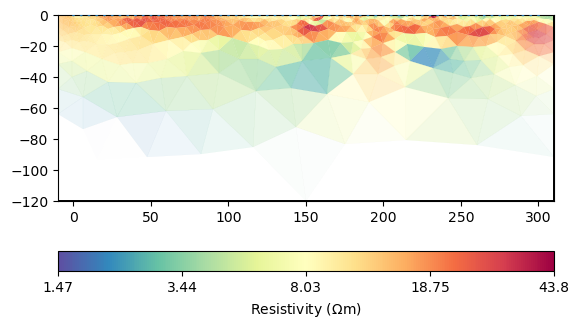

In [5]:
mgr.invert(zWeight=0.2, verbose=1)
mgr.showResult()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x15f371b9610>)

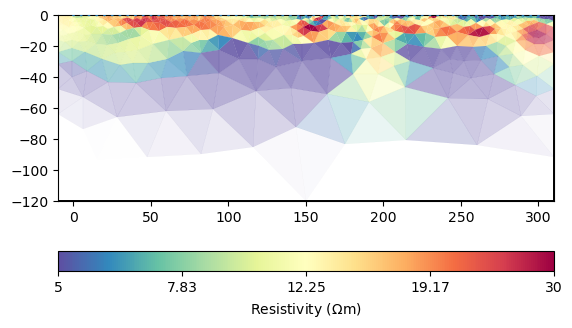

In [6]:
mgr.showResult(cMin=5, cMax=30)

array([<Axes: >, <Axes: >], dtype=object)

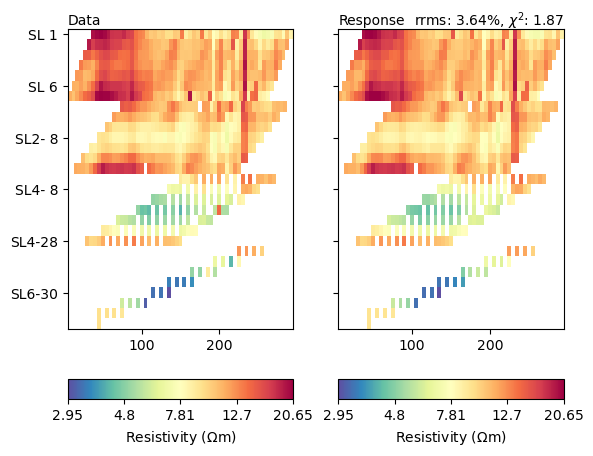

In [17]:
mgr.showFit()

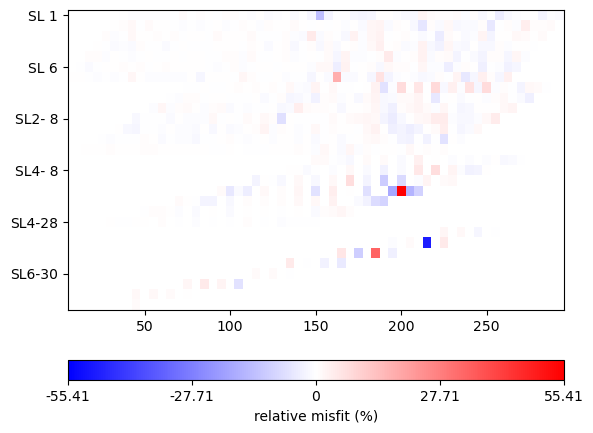

In [18]:
mgr.showMisfit()

In [21]:
import numpy as np
misfit = -mgr.inv.response / mgr.data["rhoa"] * 100 + 100
np.nonzero(abs(misfit) > 20)

(array([ 77, 108, 111], dtype=int64),)

In [22]:
data.markInvalid(np.nonzero(abs(misfit) > 20)[0])
data.removeInvalid()
print(data)

Data: Sensors: 61 data: 808, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'rhoa', 'u', 'valid']


In [26]:
mgr = ert.Manager(data)
mgr.invert(zWeight=0.3, verbose=1)

21/11/23 - 12:17:49 - pyGIMLi - INFO - Found 2 regions.
21/11/23 - 12:17:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/11/23 - 12:17:49 - pyGIMLi - INFO - Found 2 regions.
21/11/23 - 12:17:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/11/23 - 12:17:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/11/23 - 12:17:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/11/23 - 12:17:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2658 Cells: 4988 Boundaries: 3904
21/11/23 - 12:17:49 - pyGIMLi - INFO - Use median(data values)=10.7065
21/11/23 - 12:17:49 - pyGIMLi - INFO - Created startmodel from forward operator: 975, min/max=10.706500/10.706500
21/11/23 - 12:17:49 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015F3A489B30>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015F3A489E50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015F3A491B20>
min/max (data): 2.95/20.65
min/max (error): 3%/3.03%
min/max (start model): 10.71/10.71
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  110.98
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.05 (dPhi = 94.33%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.03 (dPhi = 64.28%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.92 (dPhi = 48.17%) lam: 20.0


################################################################################
#                  Abort criterion reached: c

975 [21.992886249511116,...,3.08786619952582]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x15f468583a0>)

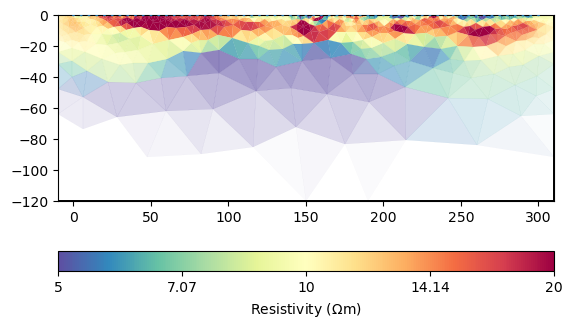

In [33]:
mgr.showResult(cMin=5, cMax=20)

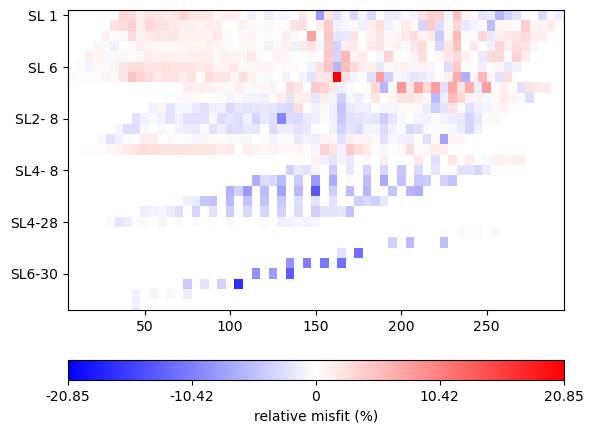

In [30]:
mgr.showMisfit()